# Выявление закономерностей, определяющих успешность продаж в сфере компьютерных игр, на основе исторических данных о продажах, взятых из открытых источников.

**Цель исследования:**
выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости в данных о продажах игр, оценках пользователей и экспертов, жанров и платформ. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании интернет-магазина "Стримчик".

**Ход исследования:**
Данные получаю из файла /datasets/games.csv. О качестве данных ничего не известно. Поэтому прежде всего понадобится обзор данных.

**Исследование пройдёт в шесть этапов:**

1) Открою файл с данными и изучу общую информацию.

2) Подготовлю данные (приведу в надлежащий вид заголовков столбцов, преобразую данные в нужный тип, выявлю и обработаю пропуски, подсчитаю суммарные продажи во всех регионах).

3) Проведу исследовательский анализ данных (сколько игр выпускалось в разные годы, важны ли данные за все периоды, как менялись продажи по платформам, выбор платформ с наибольшими суммарными продажами и построение распределения по годам и т.д. и т.п).

4) Составлю портрет пользователя каждого региона (Северная Америка, Европа, Япония), топ-5 самых популярных платформ и жанров, влияние рейтинга ESRB на продажи по регионам.

5) Проверю гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные

6) Общие выводы.

In [1]:
# Загружаю необходимые в работе библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

### Открою файл с данными и изучу общую информацию. 

In [2]:
# Открываю файл с данными
df = pd.read_csv('/datasets/games.csv')
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


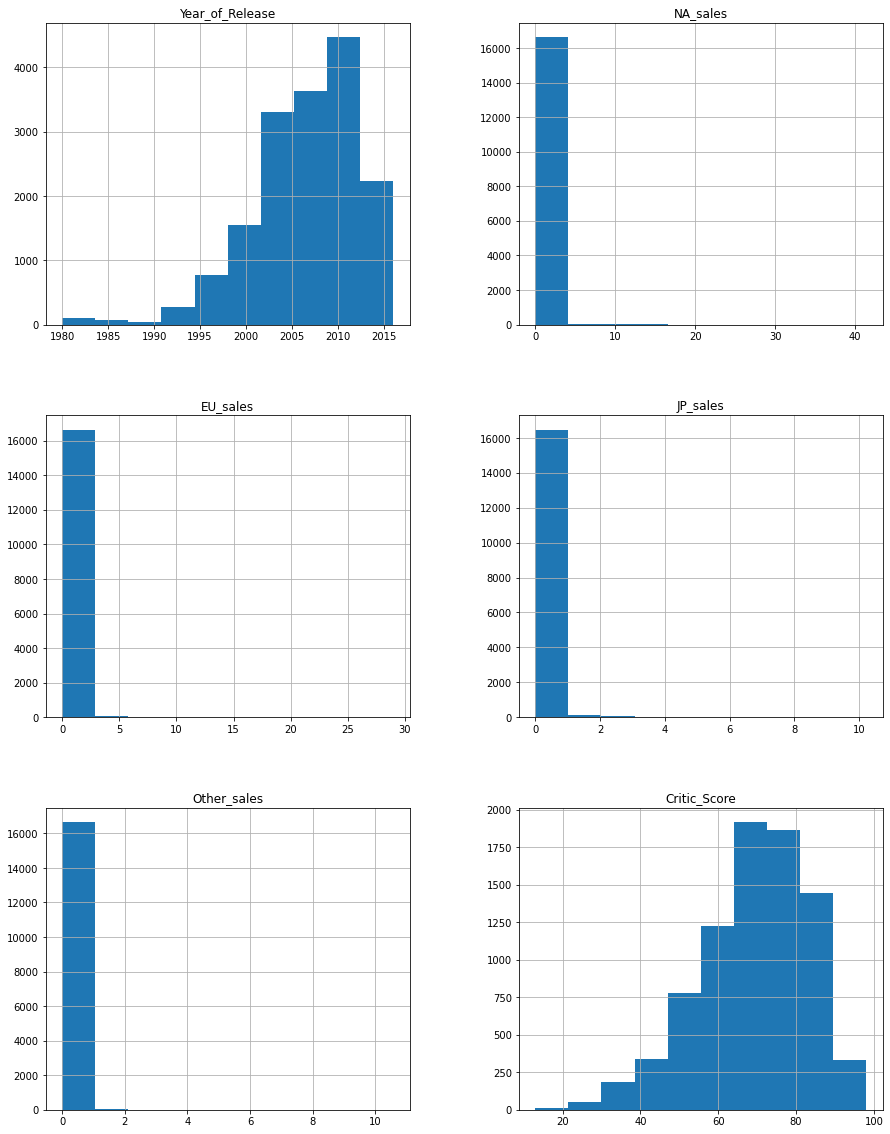

In [3]:
# Выведу основную информацию о датафрейме
df.info()
df.hist(figsize=(15,20));

16715 записей, 11 столбцов. Количество цифровых столбцов 6 (столбец 'User_Score' необходимо будет также преобразовать в float64).

Также требуется преобразование столбца "Year_of_Release" в тип Int.

Имеем пропуски в столбцах: "Name", "Year_of_Release", "Genre", "Critic_Score", "User_Score", "Rating".

По гистограммам числовых столбцов можно сделать предварительные выводы:
- Наблюдаемый всплеск производства игр с 2002 по 2012 годы.
- Максимальное количество продаж - в Северной Америке (около 4 млн.копий). Далее идёт Европа (3 млн.), затем Япония (1 млн.) и остальные страны (1 млн.)
- Преобладающая оценка критиков - от 60 до 85 баллов.

### Подготовлю данные

In [4]:
# Приведу названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
# Посмотрю, что за строки без названия игры
print(df[df['name'].isna()])
# В большинстве столбцов имеем NaN, это явный "мусор". Удалю эти строки, заодно избавлюсь от пропусков в столбце "Genre"
df = df.dropna(subset=['name'])

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In [6]:
# Проверю колличество пропусков в % 
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


In [7]:
# Удалю строки с пропусками в годе выпуска, т..к. их всего 2%
df = df.dropna(subset=['year_of_release'])

In [8]:
# Выясню, какие уникальные значения встречаются в "user_score"
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
# Преобразую данные в нужные типы
# В столбце 'user_score' имеется аббревиатура 'tbd', что расшифровывается, как "To Be Determined" (будет определено).
# Заменю на Nan
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan
data_types_dict = {'year_of_release': int, 'user_score': float}
df = df.astype(data_types_dict)

In [10]:
# Преобразую и заполню пропуски в столбце rating
df.loc[df['rating'] == 'K-A','rating'] = 'E'
df['rating'] = df['rating'].fillna('unknown')

In [11]:
# Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец
df['general_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [12]:
# Проверю, есть ли стрки с нулевым количеством суммарных продаж во всех регионах 
df[df['general_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,general_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,unknown,0.0


Всего 2 строки имеют значения в столбцах "na_sales", "eu_sales", "jp_sales" и "other_sales", равные нулю. Так как в данных столбцах значения о продажах указаны в миллионах копий, возможно данный факт случился из-за округления (малое количество (значительно меньше миллиона) - имеем ноль продаж). Но так как и в остальных столбцах крайне мало полезной информации, скорее всего это "мусор". Удаляю эти строки: 

In [13]:
df = df[df['general_sales'] != 0]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16442 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16442 non-null  object 
 1   platform         16442 non-null  object 
 2   year_of_release  16442 non-null  int64  
 3   genre            16442 non-null  object 
 4   na_sales         16442 non-null  float64
 5   eu_sales         16442 non-null  float64
 6   jp_sales         16442 non-null  float64
 7   other_sales      16442 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16442 non-null  object 
 11  general_sales    16442 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Итоги**
1) Привёл все названия столбцов к нижнему регистру

2) В столбце названия игры имелось 2 пропуска. При изучении этих строк, стало ясно, что в большинстве столбцов этих строчек имеем NaN, это явный "мусор". В этих же строках единственные пропуски столбца "Genre". Удалил эти строки.

3) В столбце 'user_score' имелась аббревиатура 'tbd', что расшифровывается, как "To Be Determined" (будет определено). Заменил на Nan (отсутствие оценки пользователя).

4) В столбце "year_of_release" имеем 2% пропусков. При анализе стало ясно, что часть из этих игр - год выпуска имеют в своём названии. По остальным пропускам в годе выпуска игры есть предположение, что игра выпущена до 1980 года и их год выпуска не попал в наши исторические данные. Данную гипотезу подтверждает ещё и то, что по этим играм нет никаких данных о продажах (стоят нули). Удалил строки с данными пропусками, т.к. их мало (2%).

5) В столбце "general_sales" имел 2 пропуска. Удалил их.

6) Пропуски в столбце "critic_score" составляют 51% и объясняется тем, что критики дают свою оценку только половине игр на рынке, что объяснимо. Оставил эти пропуски.

7) Подобное объяснение и по пропускам в столбце "rating" - ассоциация, определяющая возрастной рейтинг игр, не в состоянии отслеживать все игры на рынке. Рейтинги К-А (старое обозначение) и Е (новое обозначение) - одно и то же. Заменил "К-А" на "Е", а все имеющиеся пропуски заполнил "unknown".

8) Наибольшее количество пропусков в колонке "user_score" - 40%. Менее половины пользователей оставляют отзывы. Оставил эти пропуски.

### Исследовательский анализ данных

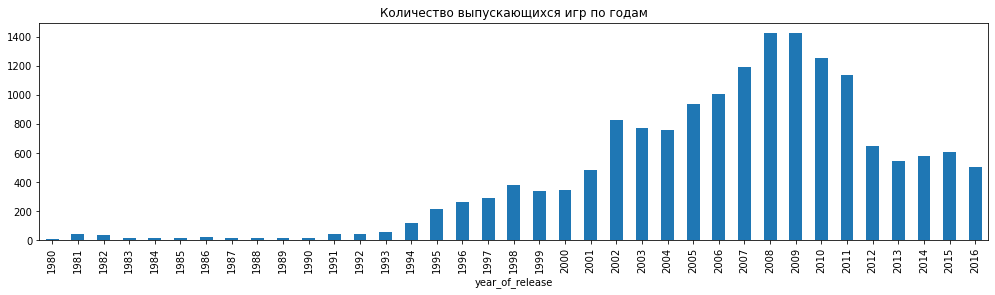

In [15]:
# Проанализирую количество выпускающихся игр по годам
df.groupby('year_of_release')['name'].count().plot(kind = 'bar', figsize = (17,4),
                                                   title = "Количество выпускающихся игр по годам");

Из диаграммы видно, что до 1994 года включительно игровой рынок находился в зачаточном состоянии, этими данными можно пренебречь:

In [16]:
df = df.query('year_of_release > 1994')

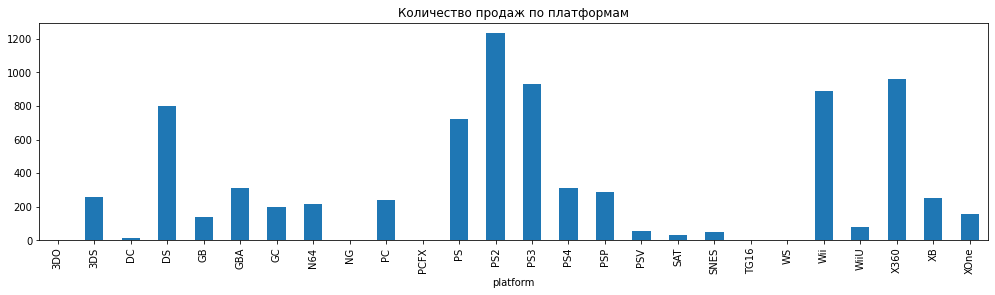

In [17]:
# Построю диаграмму распределения продаж по платформам
df.groupby('platform')['general_sales'].sum().plot(kind = 'bar', figsize = (17,4), title = "Количество продаж по платформам");

Самые продаваемые платформы: DS, PS, PS2, PS3, Wii, X360

**Построю распределение по годам для найденных популярных платформ**

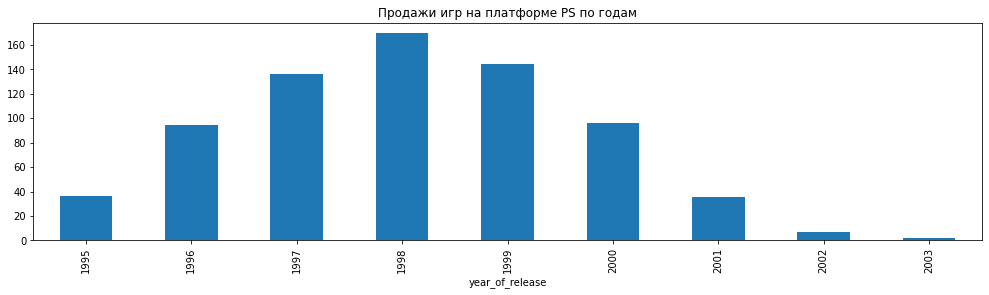

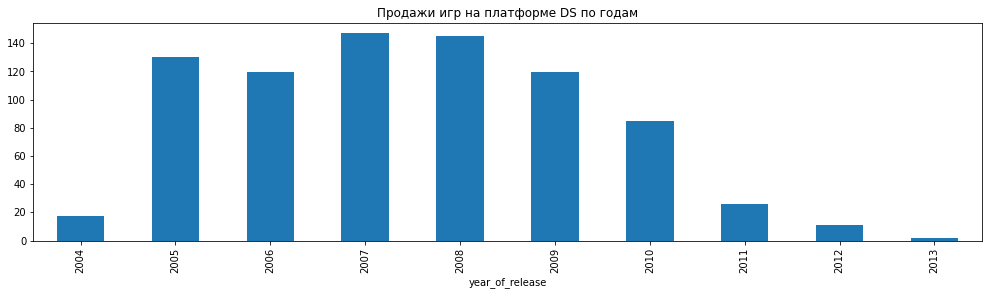

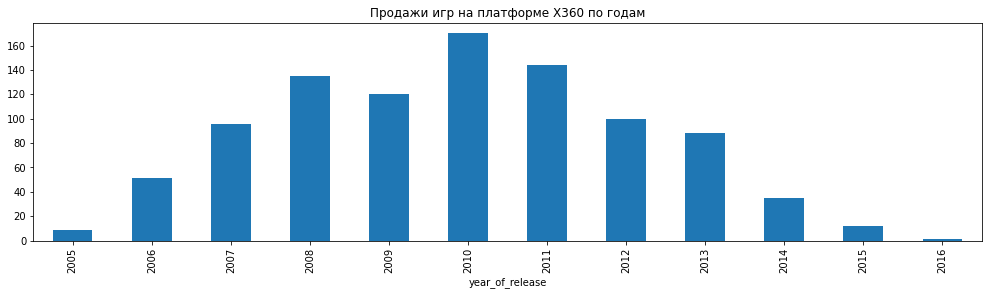

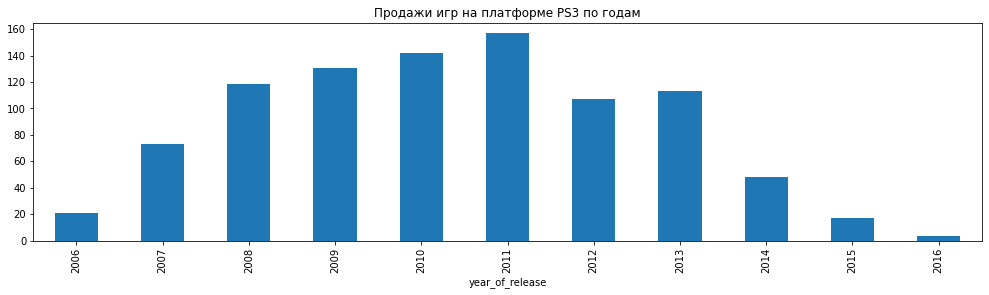

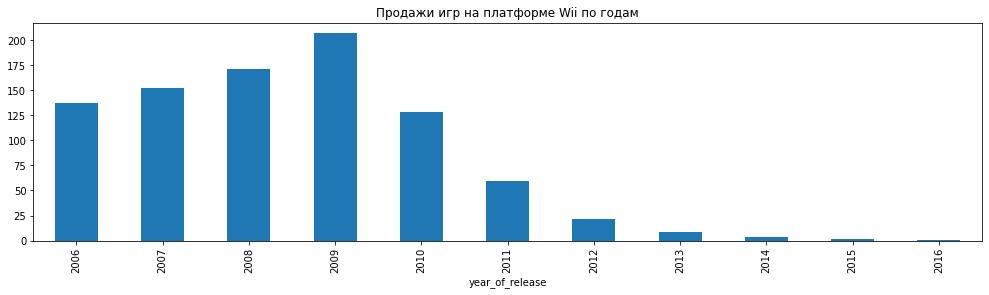

In [18]:
list = ['PS', 'DS', 'X360', 'PS3', 'Wii']
for i in list:
    df[df['platform'] == i].groupby('year_of_release')['general_sales'].sum().plot(
    kind = 'bar', figsize = (17,4), title = f"Продажи игр на платформе {i} по годам")
    plt.show()

In [25]:
# Создам таблицу с "годом релиза платформы" и "сколько лет платформа продавалась"
platforms_lifetime = df.groupby('platform').agg({'year_of_release': ['min', 'max']})
platforms_lifetime.columns = ['year_of_release', 'lifetime']
platforms_lifetime['lifetime'] = platforms_lifetime['lifetime'] - platforms_lifetime['year_of_release']
print(platforms_lifetime.sort_values(by='year_of_release'))

          year_of_release  lifetime
platform                           
3DO                  1995         0
TG16                 1995         0
GB                   1995         6
SNES                 1995         4
SAT                  1995         4
NG                   1995         1
PC                   1995        21
PS                   1995         8
N64                  1996         6
PCFX                 1996         0
DC                   1998        10
WS                   1999         2
PS2                  2000        11
GBA                  2000         7
XB                   2000         8
GC                   2001         6
PSP                  2004        11
DS                   2004         9
X360                 2005        11
PS3                  2006        10
Wii                  2006        10
PSV                  2011         5
3DS                  2011         5
WiiU                 2012         4
PS4                  2013         3
XOne                 2013   

Проанализировав диаграммы, а также полученную таблицу с "годом релиза платформы" и "сколько лет всего платформа продавалась", делаю выводы:
- Средний срок "жизни" самых продаваемых платформ - 9 лет
- Бум создания платформ пришёл на 1995 год (8шт.). Далее практически ежегодно выпускалась 1-2 платформы в год (в 2000году - 3шт.), до 2006 года. Далее образовалась пятилетняя пауза, и с 2011 года тенденция выпуска новых платформ возобновилась.
- Есть платформы-долгожители (именно по факту использования): PC (персональный компьютер), время жизни - весь рассматриваемый период (21 год), и это понятно, 11 лет (PS2, PSP, X360), 10 лет (DC, PS3, Wii)

Но, если проанализировать диаграмму по количеству выпускающихся игр по годам, понятно, что для построения прогноза на 2017 год "актуальными данными" можно считать данные с 2012 по 2015 годы (2016 год у нас не полный), т.к. игровой рынок в этот период стабилизировался.

Также учитывая средний срок "жизни" платформ, рассматриваю только с релизом после 2009 года включительно, а это платформы 3DS, PSV, WiiU, PS4, XOne.
Изучу теперь именно эти данные, т.к. картина в них могла принципиально измениться:

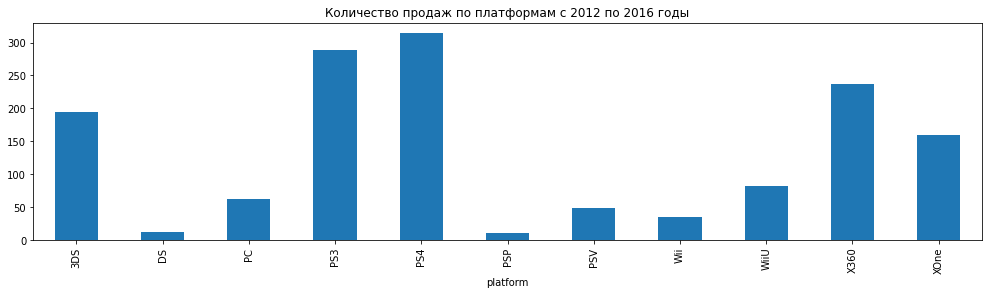

In [26]:
# Построю диаграмму распределения продаж по платформам с 2012 по 2016 годы
df_actual = df[(df['year_of_release'] > 2011)]
df_actual.groupby('platform')['general_sales'].sum().plot(kind = 'bar', figsize = (17,4),
                                                          title = "Количество продаж по платформам с 2012 по 2016 годы");

Действитеьно, лидеры оказались другими (Х360 и PS3 во внимание не беру, т.к. их продажи в 2015 году упали практически до минимума). Строю диаграммы продаж для выбранных 5 платформ:

In [27]:
df_actual['year_of_release'].unique()

array([2013, 2015, 2012, 2014, 2016])

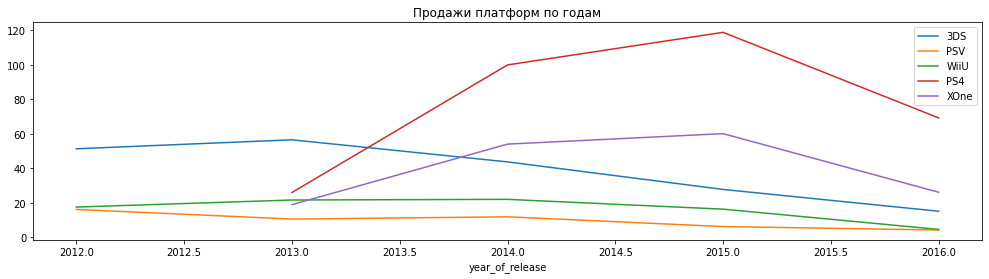

In [28]:
list_new = ['3DS', 'PSV', 'WiiU', 'PS4', 'XOne']
for i in list_new:
    df_actual[df_actual['platform'] == i].groupby('year_of_release')['general_sales'].sum().plot(figsize = (17,4))
plt.title("Продажи платформ по годам")
plt.legend(list_new)
plt.show()

- Платформа "3DS" начала стабильно падать с 2013 года, перспективной её считать нельзя.
- Платформа "WiiU" имела пик в 2014 году, далее началось снижение. Перспективной считать нельзя.
- Платформа "PS4" показывала пик в 2015 году, считаем её перспективной.
- Платформа "XOne" также показывала пик в 2015 году, её также нельзя обойти без внимания.
- Платформа "PSV" имела максимум продаж в 2012 году, а далее показатели ухудшались. Забываю о ней.

<AxesSubplot:xlabel='year_of_release'>

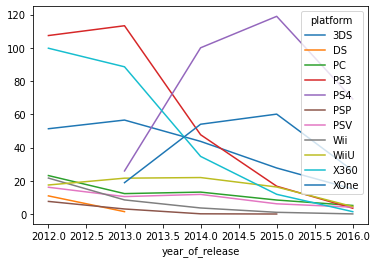

In [34]:
df_actual.pivot_table(index='year_of_release',columns='platform',values='general_sales',aggfunc='sum').plot()

In [35]:
# Построим Ящик с усами по глобальным продажам игр на платформе PS4
#plt.ylim(0,2.7)
#df_actual[df_actual['platform'] == 'PS4'].boxplot(column = 'general_sales')
#plt.title("Ящик с усами по глобальным продажам игр на платформе PS4")
#plt.show()

In [36]:
# Построим Ящик с усами по глобальным продажам игр на платформе XOne
#plt.ylim(0,2.7)
#df_actual[df_actual['platform'] == 'XOne'].boxplot(column = 'general_sales')
#plt.title("Ящик с усами по глобальным продажам игр на платформе XOne")
#plt.show()

Графики показывают нам следующий результат: медиана у обоих - на значении около 300тысяч копий, ящик (набор данных между 1 и 3 квартилем): от 200 тысяч до 1,2 млн. у обоих платформ. Верхний ус платформы XOne располагается на 2,4 млн. копий, а для платформы PS4 - на 2,5 млн. копий (платформа перспективнее)

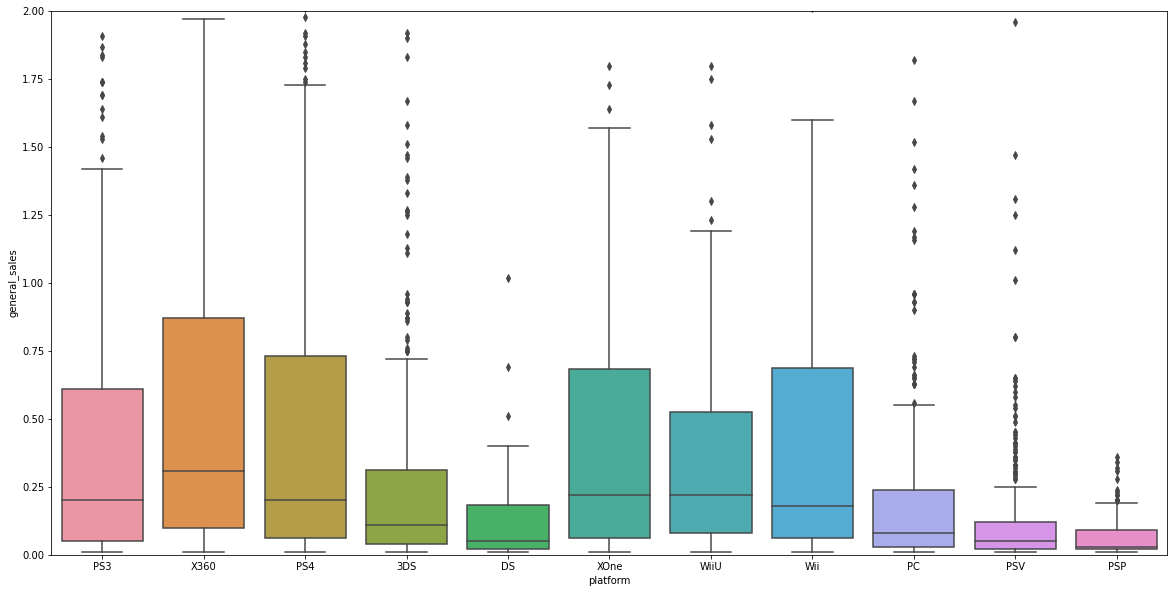

In [38]:
f, ax = plt.subplots(figsize = (20,10)) # задали размер графика
fig = sns.boxplot(x = 'platform', y = 'general_sales', data = df_actual)
plt.axis(ymin = 0, ymax = 2); # задали лимит по оси y

<div class="alert alert-info">
    
Платформа Х360 на данном рисунке показывает самые лучшие показатели, хотя она и довольно старая, и даёт ежегодное снижение продаж. Следующая по перспективности - PS4. На третьем месте XOne и Wii (имеют практически одинаковые параметры)
</div>

**Изучу - существует ли зависимость отзывов пользователей и критиков на продажи внутри одной из популярных платформ**

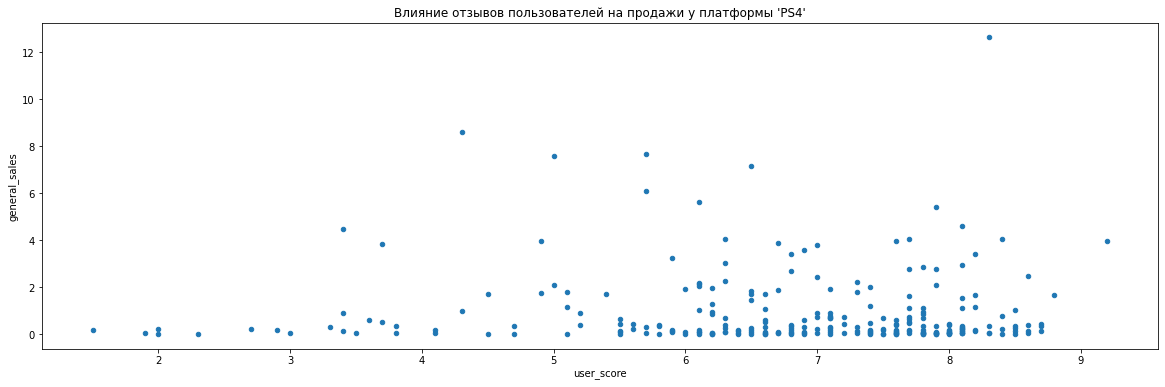

In [39]:
# Строю диаграмму рассеяния "Влияние отзывов пользователей на продажи у платформы 'PS4'"
df_actual[df_actual['platform'] == 'PS4'].plot(x = 'user_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                               title = "Влияние отзывов пользователей на продажи у платформы 'PS4'");

In [40]:
# Посчитаю корреляцию "отзывы пользователей-продажи" у платформы 'PS4'
df_actual[df_actual['platform'] == 'PS4']['general_sales'].corr(df['user_score'])

-0.031957110204556376

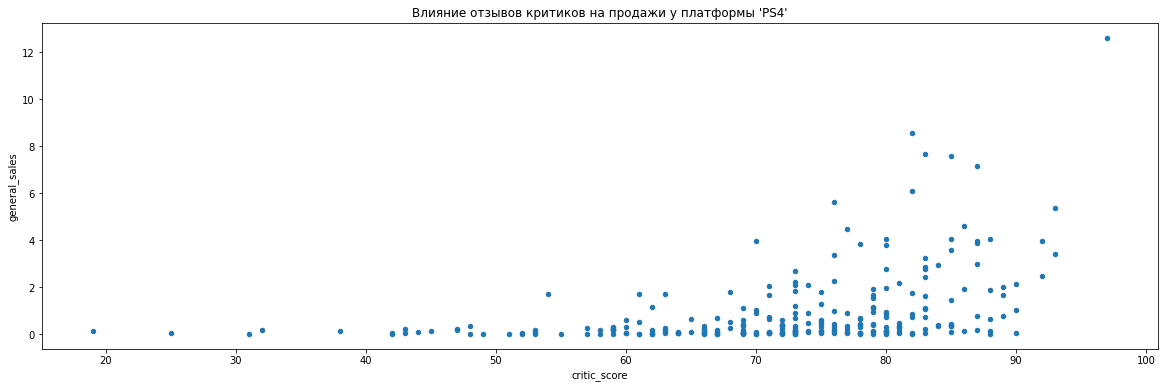

In [41]:
# Строю диаграмму рассеяния "Влияние отзывов критиков на продажи у платформы 'PS4'"
df_actual[df_actual['platform'] == 'PS4'].plot(x = 'critic_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                               title = "Влияние отзывов критиков на продажи у платформы 'PS4'");

In [42]:
# Посчитаю корреляцию "отзывы критиков-продажи" у платформы 'PS4'
df_actual[df_actual['platform'] == 'PS4']['general_sales'].corr(df['critic_score'])

0.406567902061781

**Выводы:**
- связь продаж с отзывами пользователей слабая, при чём наблюдается обратная зависимость (с ростом количества пользователей - продажи падают). Это может быть связано с тем, что пользователи в основном пишут отзыв только в том случае, когда они недовольны игрой.
- влияние отзывов критиков на продажи довольно сильное и прямое (чем больше отзывов - тем выше продажи)

*Проверю эти выводы на платформе XOne:*

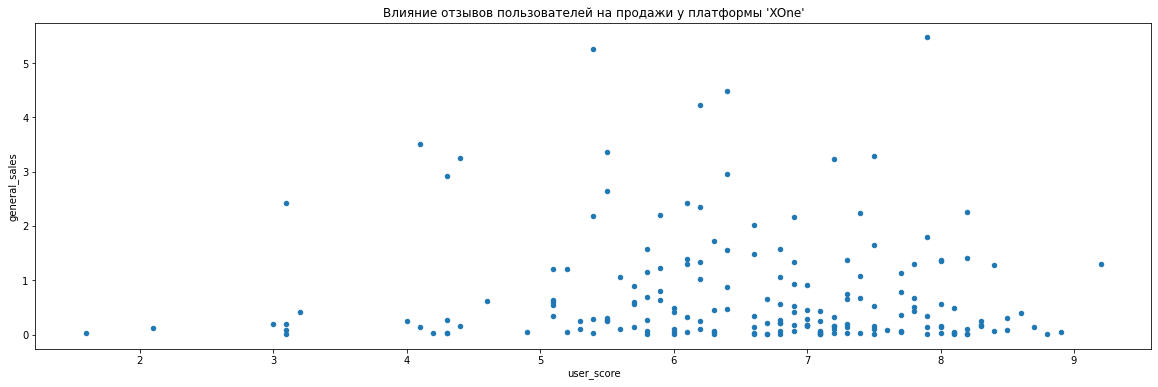

In [43]:
# Строю диаграмму рассеяния "Влияние отзывов пользователей на продажи"
df_actual[df_actual['platform'] == 'XOne'].plot(x = 'user_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                                title = "Влияние отзывов пользователей на продажи у платформы 'XOne'");

In [44]:
# Посчитаю корреляцию "отзывы пользователей-продажи"
df_actual[df_actual['platform'] == 'XOne']['general_sales'].corr(df['user_score'])

-0.06892505328279412

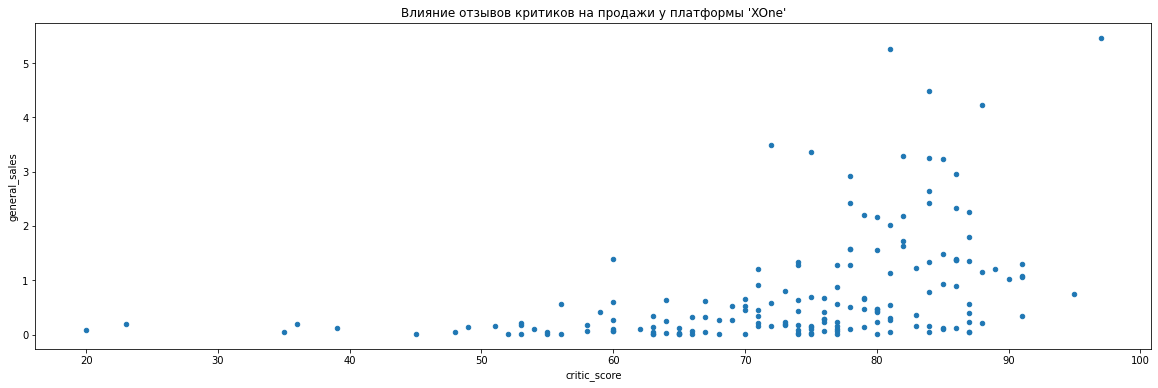

In [45]:
# Строю диаграмму рассеяния"Влияние отзывов критиков на продажи"
df_actual[df_actual['platform'] == 'XOne'].plot(x = 'critic_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                                title = "Влияние отзывов критиков на продажи у платформы 'XOne'");

In [46]:
# Посчитаю корреляцию "отзывы критиков-продажи"
df_actual[df_actual['platform'] == 'XOne']['general_sales'].corr(df['critic_score'])

0.41699832800840175

Результаты идентичны, т.е. выводы верны.

**Платформа 3DS**

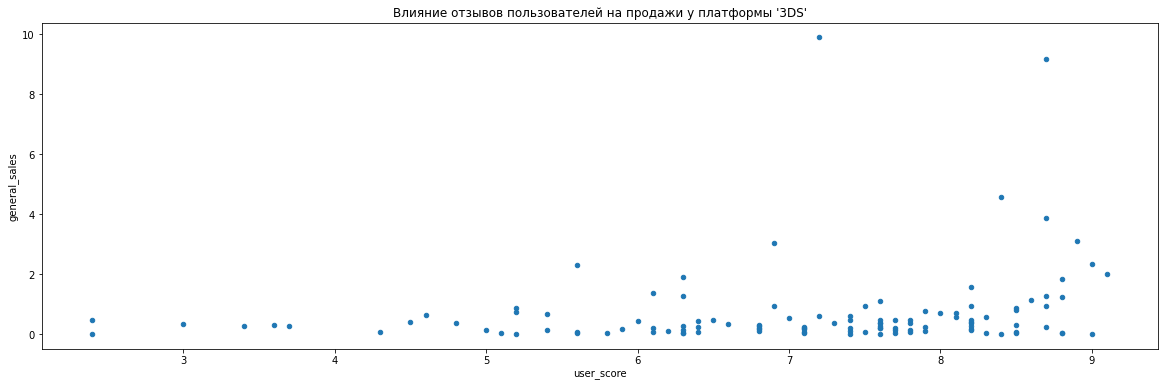

In [47]:
# Строю диаграмму рассеяния "Влияние отзывов пользователей на продажи"
df_actual[df_actual['platform'] == '3DS'].plot(x = 'user_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                                title = "Влияние отзывов пользователей на продажи у платформы '3DS'");

In [48]:
# Посчитаю корреляцию "отзывы пользователей-продажи"
df_actual[df_actual['platform'] == '3DS']['general_sales'].corr(df['user_score'])

0.19758263411038596

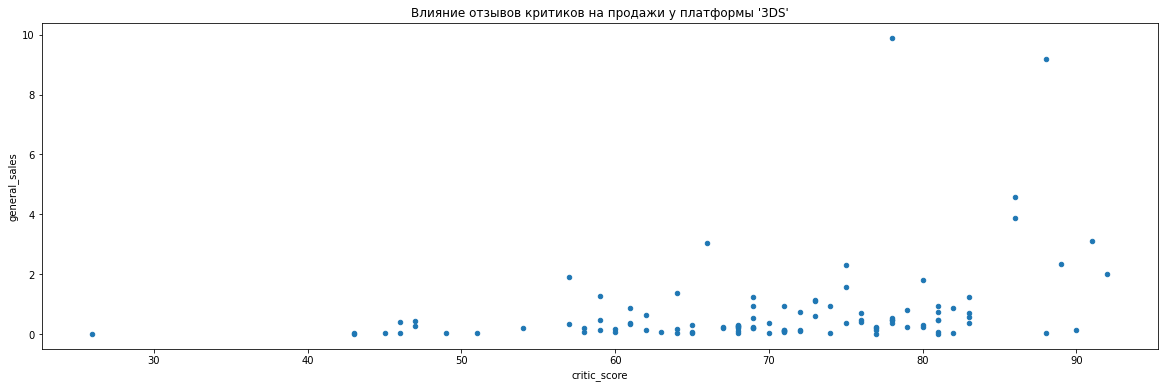

In [49]:
# Строю диаграмму рассеяния"Влияние отзывов критиков на продажи"
df_actual[df_actual['platform'] == '3DS'].plot(x = 'critic_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                                title = "Влияние отзывов критиков на продажи у платформы '3DS'");

In [50]:
# Посчитаю корреляцию "отзывы критиков-продажи"
df_actual[df_actual['platform'] == '3DS']['general_sales'].corr(df['critic_score'])

0.32080286953607845

**Платформа PC**

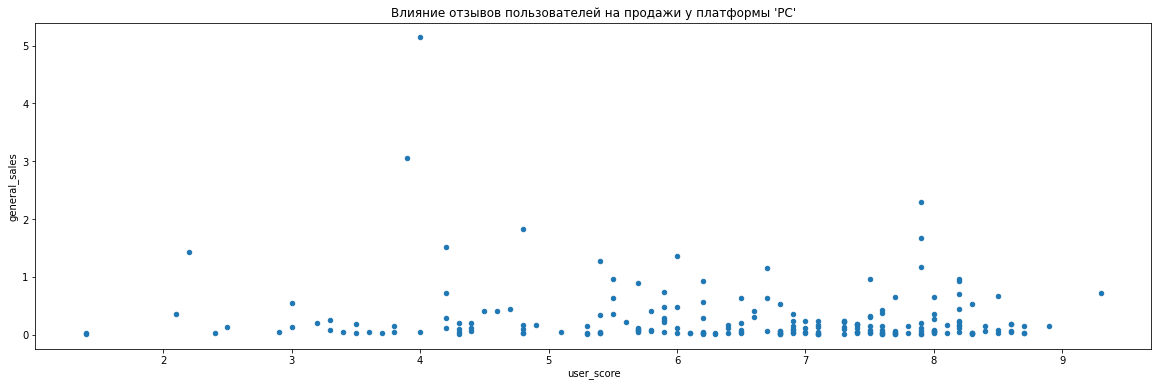

In [51]:
# Строю диаграмму рассеяния "Влияние отзывов пользователей на продажи"
df_actual[df_actual['platform'] == 'PC'].plot(x = 'user_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                                title = "Влияние отзывов пользователей на продажи у платформы 'PC'");

In [52]:
# Посчитаю корреляцию "отзывы пользователей-продажи"
df_actual[df_actual['platform'] == 'PC']['general_sales'].corr(df['user_score'])

-0.12186747630735577

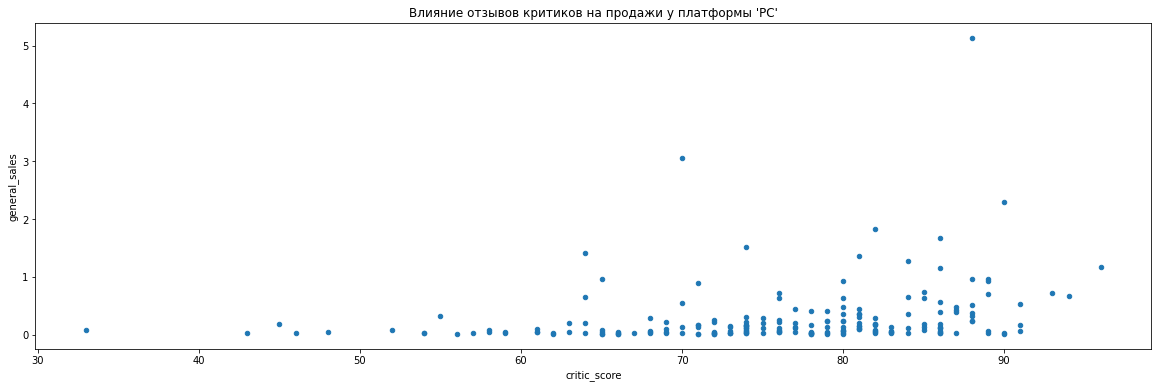

In [53]:
# Строю диаграмму рассеяния"Влияние отзывов критиков на продажи"
df_actual[df_actual['platform'] == 'PC'].plot(x = 'critic_score', y = 'general_sales', kind = 'scatter', figsize = (20,6),
                                                title = "Влияние отзывов критиков на продажи у платформы 'PC'");

In [54]:
# Посчитаю корреляцию "отзывы критиков-продажи"
df_actual[df_actual['platform'] == 'PC']['general_sales'].corr(df['critic_score'])

0.23724324311567918

<div class="alert alert-info">
    
Для этих платформ получил совершенно иные результаты.
    У "3DS" корреляция "отзывы пользователей-продажи" составила +0,2, а корреляция "отзывы критиков-продажи" составила +0,32. Оба вида отзывов оказывают вполне весомое влияние на продажи. Предположительно, это связано с тем, что у некоторых американских и европейских игроков с первой прошивкой Nintendo 3DS (1.0.0-0) возникала проблема, которую позже назвали «чёрный экран смерти», и покупатели с недоверием относятся к платформе (читают отзывы).
    У "РС" (платформа персональных компьютеров) корреляция "отзывы пользователей-продажи" составила -0,12 (чуть более отрицательная, чем "XOne" и "PS4", но всё-равно значение мало, чтобы принимать во внимание), а корреляция "отзывы критиков-продажи" составила 0,24 (в два раза меньше, чем "XOne" и "PS4"), что также объяснимо, т.к. потребители рынка игр на ПК более прислушиваются к отзывам своих друзей, чем к сторонним отзывам.
</div>

**Посмотрю общее распределение игр по жанрам**

In [55]:
df_actual.groupby('genre').agg({'general_sales': ['count', 'sum']})

general_sales        
                     count     sum
genre                             
Action                1031  441.12
Adventure              302   29.43
Fighting               109   44.49
Misc                   192   85.04
Platform                85   61.00
Puzzle                  28    4.89
Racing                 115   53.50
Role-Playing           370  192.80
Shooter                235  304.73
Simulation              80   35.12
Sports                 268  181.07
Strategy                71   13.34

In [56]:
print(df_actual.groupby('genre')['general_sales'].median().sort_values())

genre
Adventure       0.030
Puzzle          0.045
Strategy        0.080
Action          0.120
Misc            0.120
Simulation      0.120
Fighting        0.130
Racing          0.140
Role-Playing    0.140
Platform        0.210
Sports          0.240
Shooter         0.440
Name: general_sales, dtype: float64


<div class="alert alert-info">

- Максимальное количество игр, и максимальное количество проданных копий - у жанра "Экшн" (1031 игра, 441 млн. проданных копий)
- Жанр с низкими продажами: "Пазлы" (28 игр, 4,9 млн. проданных копий)
- Но с медианными продажами ситуация иная. На первом месте - Жанр "Шутер" (стрелялка, 440тыс. проданных копий), на последнем - "Адвенчура" (приключенческая игра, 30тыс. проданных копий).
</div>

### Составлю портрет пользователя каждого региона

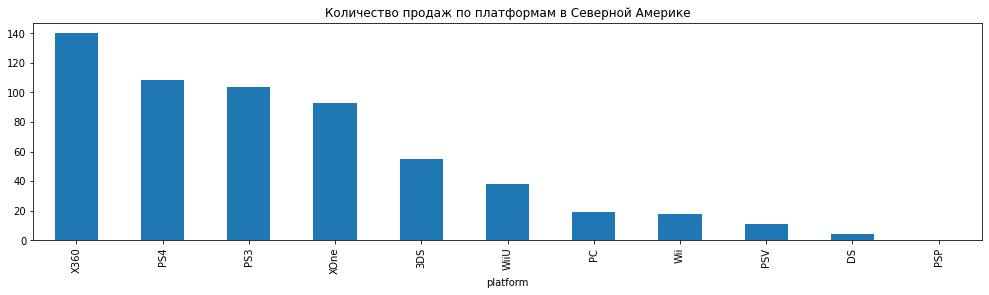

In [57]:
df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = (17,4),
                                                     title = "Количество продаж по платформам в Северной Америке");

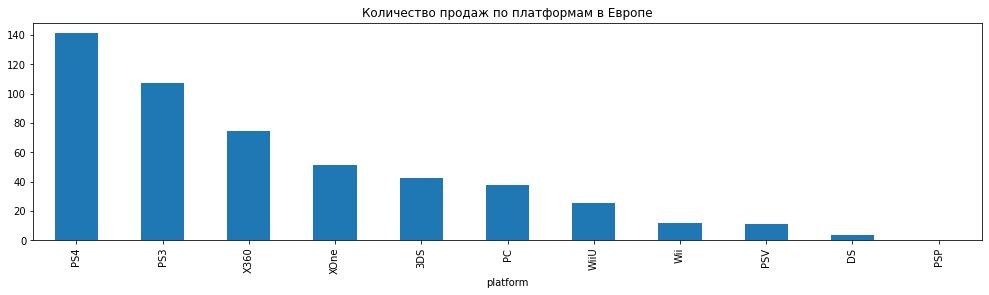

In [58]:
df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = (17,4),
                                                     title = "Количество продаж по платформам в Европе");

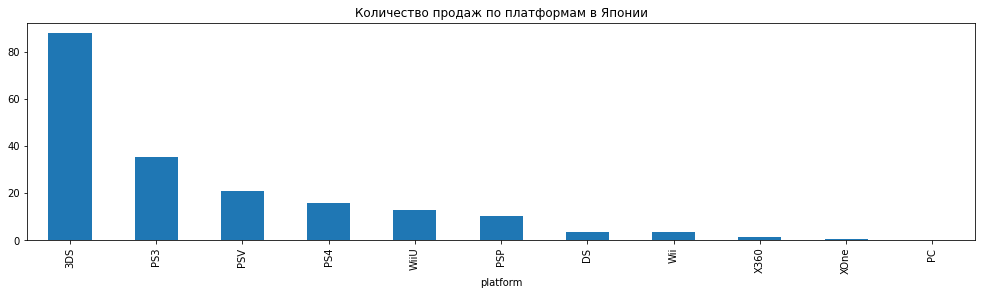

In [59]:
df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = (17,4),
                                                     title = "Количество продаж по платформам в Японии");

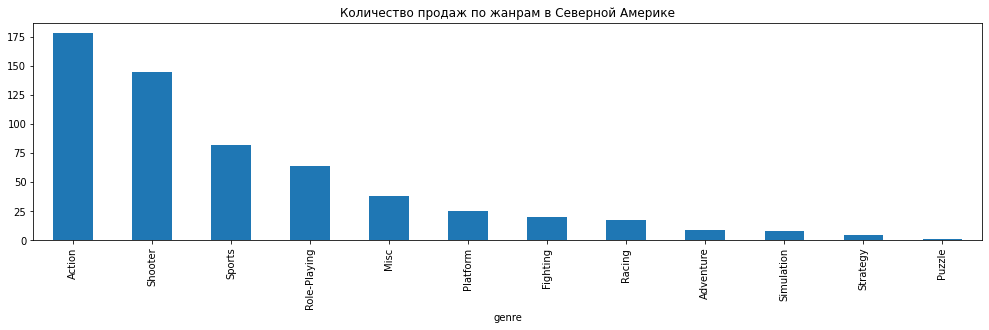

In [60]:
df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = (17,4),
                                                  title = "Количество продаж по жанрам в Северной Америке");

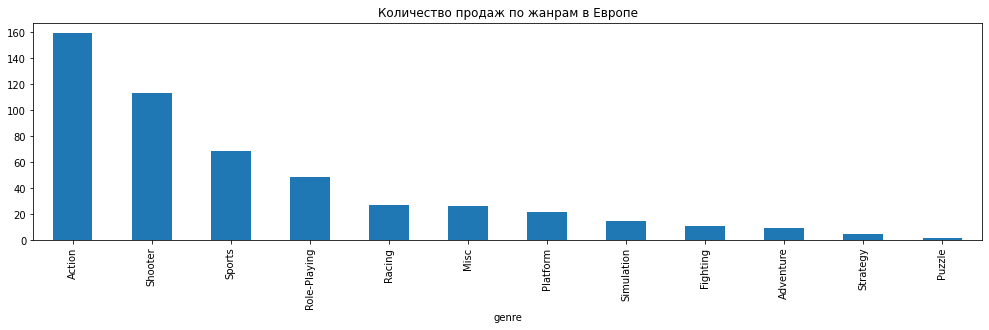

In [61]:
df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = (17,4),
                                                  title = "Количество продаж по жанрам в Европе");

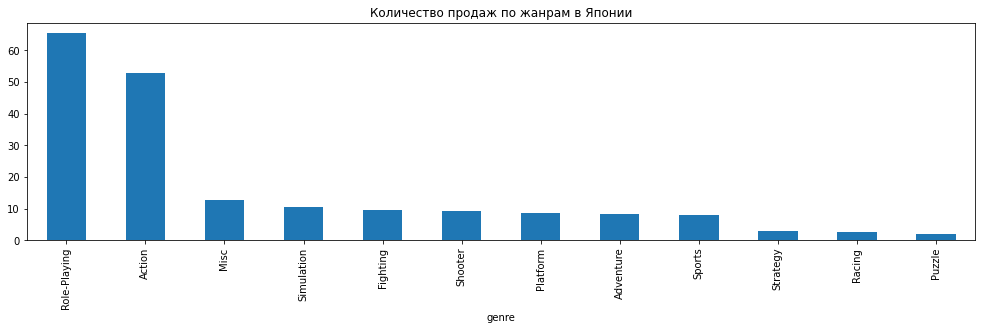

In [62]:
df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize = (17,4),
                                                  title = "Количество продаж по жанрам в Японии");

In [63]:
# Выясню, какие уникальные значения встречаются в "rating"
df_actual['rating'].unique()

array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

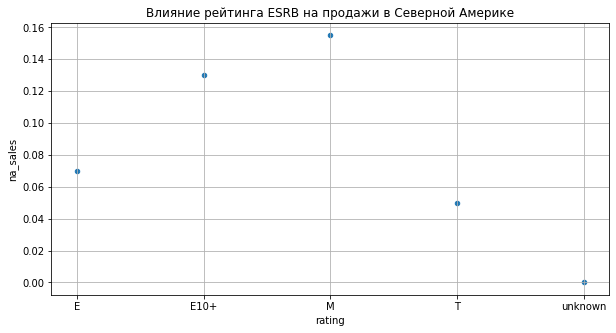

In [64]:
# Строю диаграмму рассеяния"Влияние рейтинга ESRB на продажи"
df_actual.pivot_table(index = 'rating', values = 'na_sales',
                      aggfunc = 'median').reset_index().plot(x = 'rating',
                                                             y = 'na_sales', kind="scatter", figsize = (10,5), grid = True,
                                                             title = "Влияние рейтинга ESRB на продажи в Северной Америке");

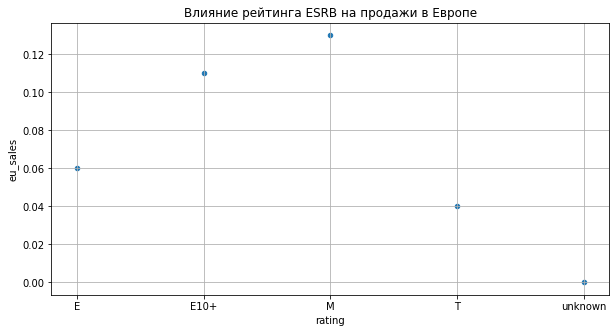

In [65]:
# Строю диаграмму рассеяния"Влияние рейтинга ESRB на продажи"
df_actual.pivot_table(index = 'rating', values = 'eu_sales',
                      aggfunc = 'median').reset_index().plot(x = 'rating',
                                                             y = 'eu_sales', kind="scatter", figsize = (10,5), grid = True,
                                                             title = "Влияние рейтинга ESRB на продажи в Европе");

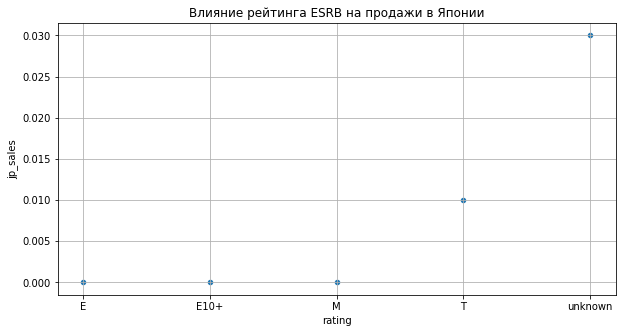

In [66]:
# Строю диаграмму рассеяния"Влияние рейтинга ESRB на продажи"
df_actual.pivot_table(index = 'rating', values = 'jp_sales',
                      aggfunc = 'median').reset_index().plot(x = 'rating',
                                                             y = 'jp_sales', kind="scatter", figsize = (10,5), grid = True,
                                                             title = "Влияние рейтинга ESRB на продажи в Японии");

<div class="alert alert-info">

**ВЫВОДЫ**

*ТОП-5 популярных платформ.* Ситуация по регионам принципиально отличается:
- Северная Америка: X360(140млн.), PS4(105млн.), PS3(100млн.), XOne(90млн.), 3DS(55млн.)
- Европа:           PS4(140млн.), PS3(105млн.), X360(70млн.), XOne(57млн.), 3DS(40млн.)
- Япония:           3DS(90млн.), PS3(35млн.), PSV(20млн.), PS4(15млн.), WiiU(10млн.)

*ТОП-5 популярных жанров:*
- Северная Америка: на первом месте "Экшн"(175млн.). Далее идут "Боевики"(140млн.), "Спортивные"(80млн.), "Ролевые" (60млн.) и "Мьюзиклы"(30млн.).
- Европа: практически полностью повторяет градацию популярности Северной Америки: "Экшн"(160млн.), "Боевики"(100млн.), "Спортивные"(65млн.), "Ролевые" (50млн.) и "Погони"(30млн.) (рейтинг чуть выше Мьюзиклов, хотя в Северной Америке у них низкая популярность).
- Япония: восток - дело тонкое... "Ролевые"(65млн.), "Экшн"(52млн.). Остальные - значительно ниже: Мьюзикл(12млн.), Симуляции(11млн.), Экшн-бои(10млн.).

*Рейтинг ESRB.*
На продажи однозначно влияет. При чём в Америке и Европе зависимость одинаковая (самый влияемый рейтинг "для всех", а самые "невлияемый" - с возрастным цензом "13+", не считая "unknown"), а в Японии - прямо-противоположная (рейтинг "unknown" - на вершине, далее идёт"13+", а остальные рейтинги не оказывают никакого влияния.). Это связано в основном, с Японским законодательством - с 2006 года в Японии ужесточили требования к возрастным рейтингам в сфере компьютерных игр и к контролю за этим в сфере продаж. После чего продать (и соответственно купить) игру с рейтингом, отличным от "для всех", стало довольно сложно.
</div>

### Проверю гипотезы

**Гипотеза 1 "Средние пользовательские рейтинги платформ Xbox One, PC одинаковые"**

Н_0: Средние значения user_score для платформы XOne = Среднему значению user_score для платформы PC.

Н_а: Средние значения user_score для платформы XOne != Среднему значению user_score для платформы PC.

alpha = 0,05

Генеральные совокупности независимы, выборочные средние нормально распределены, гипотеза двухсторонняя. Поэтому использую scipy.stats.ttest_ind

In [67]:
alpha = 0.05 # критический уровень статистической значимости
# проверю гипотезу о равенстве средних двух независимых совокупностей
results = st.ttest_ind(
    df_actual[df_actual['platform'] == 'XOne']['user_score'],
    df_actual[df_actual['platform'] == 'PC']['user_score'], nan_policy='omit')
print('p-значение:', results.pvalue) # вывожу на экран получившеся p-значение)

if results.pvalue < alpha: # сравниваю получившееся p-значение с заданным уровнем статистической значимости:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


**Гипотеза подтвердилась!**

**Гипотеза 2 "Средние пользовательские рейтинги жанров Action и Sports разные"**

Н_0: Средние значения user_score для жанра Action = Среднему значению user_score для жанра Sports.

Н_а: Средние значения user_score для жанра Action != Среднему значению user_score для жанра Sports.

alpha = 0,05

Генеральные совокупности независимы, выборочные средние нормально распределены, гипотеза двухсторонняя. Поэтому также использую scipy.stats.ttest_ind. Но в данном случае если гипотеза подтвердится, когда отвергнем Н_0.

In [68]:
results = st.ttest_ind(
    df_actual[df_actual['genre'] == 'Action']['user_score'],
    df_actual[df_actual['genre'] == 'Sports']['user_score'], nan_policy='omit')
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Гипотеза подтвердилась!**

### Общий вывод

В процессе проведённого исследования по выявлению закономерностей, определяющих успешность продаж в сфере компьютерных игр, на основе исторических данных о продажах, взятых из открытых источников за период с 1980 по частично 2016 год:
1) Открыл файл с данными и изучил общую информацию. В результате определился с типами и видом имеющихся данных, что из них необходимо преобразовать, получил информацию об имеющихся пропусках. По построенным гистограммам числовых столбцов были сделаны предварительные выводы:
- Наблюдаемый всплеск производства игр с 2002 по 2012 годы. Далее наблюдалась стабилизация рынка.
- Максимальное количество продаж - в Северной Америке (около 4 млн.копий). Далее идёт Европа (3 млн.), затем Япония (1 млн.) и остальные страны (1 млн.)
- Преобладающая оценка критиков - от 60 до 85 баллов.

2) Произвёл подготовку данных:
- Привёл все названия столбцов к нижнему регистру
- В столбце названия игры имелось 2 пропуска. При изучении этих строк, стало ясно, что в большинстве столбцов этих строчек имеем NaN, это явный "мусор". В этих же строках единственные пропуски столбца "Genre". Удалил эти строки.
- В столбце 'user_score' имелась аббревиатура 'tbd', что расшифровывается, как "To Be Determined" (будет определено). Заменил на Nan (отсутствие оценки пользователя).
- В столбце "year_of_release" имели 2% пропусков. При анализе стало ясно, что часть из этих игр - год выпуска имеют в своём названии. По остальным пропускам в годе выпуска игры есть предположение, что игра выпущена до 1980 года и их год выпуска не попал в наши исторические данные. Данную гипотезу подтверждает ещё и то, что по этим играм нет никаких данных о продажах (стоят нули). Удалил строки с данными пропусками, т.к. их мало (2%).
- В столбце "general_sales" имели 2 пропуска. Удалил их.
- Пропуски в столбце "critic_score" составляют 51% и объясняется тем, что критики дают свою оценку только половине игр на рынке, что объяснимо. Оставил эти пропуски.
- Подобное объяснение и по пропускам в столбце "rating" - ассоциация, определяющая возрастной рейтинг игр, не в состоянии отслеживать все игры на рынке. Рейтинги К-А (старое обозначение) и Е (новое обозначение) - одно и то же. Заменил "К-А" на "Е", а все имеющиеся пропуски заполнил "unknown".
- Наибольшее количество пропусков в колонке "user_score" - 40%. Менее половины пользователей оставляют отзывы, при чём чаще в случаях своего недовольства игрой (преобладают отрицательные отзывы, чем положительные) Оставил эти пропуски.
- Подсчитал суммарные продажи во всех регионах (требовался для дальнейшего анализа).

3) Провёл исследовательский анализ данных:
- Анализ количества выпускающихся игр по годам. Стало понятно, что до 1994 года включительно игровой рынок находился в зачаточном состоянии, этими данными можно пренебречь, удалил.
- Построил диаграмму распределения продаж по платформам.
- Построил распределение по годам для найденных популярных платформ
- Создал таблицу с "годом релиза платформы" и "сколько лет платформа продавалась"
- **Сделал выводы**:

- Средний срок "жизни" самых продаваемых платформ - 9 лет
- Бум создания платформ пришёл на 1995 год (8шт.). Далее практически ежегодно выпускалась 1-2 платформы в год (в 2000году - 3шт.), до 2006 года. Далее образовалась пятилетняя пауза, и с 2011 года тенденция выпуска новых платформ возобновилась.
- Есть платформы-долгожители (именно по факту использования): PC (персональный компьютер), время жизни - весь рассматриваемый период (21 год), и это понятно, 11 лет (PS2, PSP, X360), 10 лет (DC, PS3, Wii)
- Проанализировав диаграмму по количеству выпускающихся игр по годам, понятно, что для построения прогноза на 2017 год "актуальными данными" можно считать данные с 2012 по 2016 годы (2016 год у нас не полный), т.к. игровой рынок в этот период стабилизировался. Далее - работал исключительно с этими данными.

Также учитывая средний срок "жизни" платформ, рассматривали только с релизом после 2009 года включительно, а это платформы 3DS, PSV, WiiU, PS4, XOne.
Снова изучил именно эти данные и выявил 2 перспективные платформы: PS4 и Xbox One, при чём потенциал PS4 выше.
Но после построения поксплотов для всех платформ, выяснилось, что платформа Х360 показывает самые лучшие показатели, хотя она и довольно старая, и даёт ежегодное снижение продаж. Следующая по перспективности - PS4. На третьем месте XOne и Wii (имеют практически одинаковые параметры)

- Изучил - существует ли зависимость отзывов пользователей и критиков на продажи (построил диаграммы рассеяния, посчитал коэффициент корреляции). Связь продаж с отзывами пользователей слабая, при чём наблюдается обратная зависимость (с ростом количества пользователей - продажи падают). Это может быть связано с тем, что пользователи в основном пишут отзыв только в том случае, когда они недовольны игрой. Влияние отзывов критиков на продажи довольно сильное и прямое (чем больше отзывов - тем выше продажи). Проверил на платформе XOne наши выводы подтвердились.
- Но при проведении такого же анализа на платформах 3DS и PC получил совершенно иные результаты. У "3DS" корреляция "отзывы пользователей-продажи" составила +0,2, а корреляция "отзывы критиков-продажи" составила +0,32. Оба вида отзывов оказывают вполне весомое влияние на продажи. Предположительно, это связано с тем, что у некоторых американских и европейских игроков с первой прошивкой Nintendo 3DS (1.0.0-0) возникала проблема, которую позже назвали «чёрный экран смерти», и покупатели с недоверием относятся к платформе (читают отзывы). У "РС" (платформа персональных компьютеров) корреляция "отзывы пользователей-продажи" составила -0,12 (чуть более отрицательная, чем "XOne" и "PS4", но всё-равно значение мало, чтобы принимать во внимание), а корреляция "отзывы критиков-продажи" составила 0,24 (в два раза меньше, чем "XOne" и "PS4"), что также объяснимо, т.к. потребители рынка игр на ПК более прислушиваются к отзывам своих друзей, чем к сторонним отзывам.
- Посмотрел общее распределение игр по жанрам. Максимальное количество игр, и максимальное количество проданных копий - у жанра "Экшн" (1031 игра, 441 млн. проданных копий). Жанр с низкими продажами: "Пазлы" (28 игр, 4,9 млн. проданных копий). Но с медианными продажами ситуация иная. На первом месте - Жанр "Шутер" (стрелялка, 440тыс. проданных копий), на последнем - "Адвенчура" (приключенческая игра, 30тыс. проданных копий).

4) Составил портрет пользователя каждого региона (Северная Америка, Европа, Япония), топ-5 самых популярных платформ и жанров, влияние рейтинга ESRB на продажи по регионам. Получил следующее:
- ТОП-5 популярных платформ. Ситуация по регионам принципиально отличается:

Северная Америка: X360(140млн.), PS4(105млн.), PS3(100млн.), XOne(90млн.), 3DS(55млн.)

Европа: PS4(140млн.), PS3(105млн.), X360(70млн.), XOne(57млн.), 3DS(40млн.)

Япония: 3DS(90млн.), PS3(35млн.), PSV(20млн.), PS4(15млн.), WiiU(10млн.)
- ТОП-5 популярных жанров:

Северная Америка: на первом месте "Экшн"(175млн.). Далее идут "Боевики"(140млн.), "Спортивные"(80млн.), "Ролевые" (60млн.) и "Мьюзиклы"(30млн.).

Европа: практически полностью повторяет градацию популярности Северной Америки: "Экшн"(160млн.), "Боевики"(100млн.), "Спортивные"(65млн.), "Ролевые" (50млн.) и "Погони"(30млн.) (рейтинг чуть выше Мьюзиклов, хотя в Северной Америке у них низкая популярность).

Япония: восток - дело тонкое... "Ролевые"(65млн.), "Экшн"(52млн.). Остальные - значительно ниже: Мьюзикл(12млн.), Симуляции(11млн.), Экшн-бои(10млн.).
- Рейтинг ESRB. На продажи однозначно влияет. При чём в Америке и Европе зависимость одинаковая (самый влияемый рейтинг "для всех", а самые "невлияемый" - с возрастным цензом "13+", не считая "unknown"), а в Японии - прямо-противоположная (рейтинг "unknown" - на вершине, далее идёт "13+", а остальные рейтинги не оказывают никакого влияния). Это связано в основном, с Японским законодательством - с 2006 года в Японии ужесточили требования к возрастным рейтингам в сфере компьютерных игр и к контролю за этим в сфере продаж. После чего продать (и соответственно купить) игру с рейтингом, отличным от "для всех", стало довольно сложно.


5) Проверка гипотез:
- Гипотеза 1. "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Гипотеза подтвердилась;
- Гипотеза 2. "Средние пользовательские рейтинги жанров Action и Sports разные". Гипотеза также подтвердилась.